# Bird Audio Classification - Task 1 (Exploratory Data Analysis)
This notebook contains all analysis done on data and on audio file such as exploratory analysis done on metadata and audio files.

## 1. Import Libreries

In [1]:
import os
import json
import librosa
import numpy as np
import pandas as pd 

import plotly.graph_objects as go
from glob import glob
import pickle
import sox
from tqdm import tqdm

import librosa
import librosa.display

import IPython.display as ipd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('birdclef-2021/train_metadata.csv')
data.head()

primary_label secondary_labels                                  type  \
0        acafly       ['amegfi']  ['begging call', 'call', 'juvenile']   
1        acafly               []                              ['call']   
2        acafly               []                              ['call']   
3        acafly      ['whwbec1']                              ['call']   
4        acafly      ['whwbec1']                              ['call']   

   latitude  longitude      scientific_name         common_name  \
0   35.3860   -84.1250  Empidonax virescens  Acadian Flycatcher   
1    9.1334   -79.6501  Empidonax virescens  Acadian Flycatcher   
2    5.7813   -75.7452  Empidonax virescens  Acadian Flycatcher   
3    4.6717   -75.6283  Empidonax virescens  Acadian Flycatcher   
4    4.6717   -75.6283  Empidonax virescens  Acadian Flycatcher   

                       author        date      filename  \
0                 Mike Nelson  2012-08-12  XC109605.ogg   
1           Allen T. Chartier  2000-12-26   XC11209.ogg   
2     Sergio Chaparro-Herrera  2012-01-10  XC127032.ogg   
3  Oscar Humberto Marin-Gomez  2009-06-19  XC129974.ogg   
4  Oscar Humberto Marin-Gomez  2009-06-19  XC129981.ogg   

                                             license  rating   time  \
0  Creative Commons Attribution-NonCommercial-Sha...     2.5  09:30   
1  Creative Commons Attribution-NonCommercial-Sha...     3.0      ?   
2  Creative Commons Attribution-NonCommercial-Sha...     3.0  15:20   
3  Creative Commons Attribution-NonCommercial-Sha...     3.5  07:50   
4  Creative Commons Attribution-NonCommercial-Sha...     3.5  07:50   

                                 url  
0  https://www.xeno-canto.org/109605  
1   https://www.xeno-canto.org/11209  
2  https://www.xeno-canto.org/127032  
3  https://www.xeno-canto.org/129974  
4  https://www.xeno-canto.org/129981

## 2. Analysis on training metadata 

In [3]:
# Get information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62874 entries, 0 to 62873
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     62874 non-null  object 
 1   secondary_labels  62874 non-null  object 
 2   type              62874 non-null  object 
 3   latitude          62874 non-null  float64
 4   longitude         62874 non-null  float64
 5   scientific_name   62874 non-null  object 
 6   common_name       62874 non-null  object 
 7   author            62874 non-null  object 
 8   date              62874 non-null  object 
 9   filename          62874 non-null  object 
 10  license           62874 non-null  object 
 11  rating            62874 non-null  float64
 12  time              62874 non-null  object 
 13  url               62874 non-null  object 
dtypes: float64(3), object(11)
memory usage: 6.7+ MB


No columns have missing values.

In [4]:
# Total number of species in the dataset
species_count = data['primary_label'].nunique()
print("Total number of species :", species_count)

Total number of species : 397


In [5]:
# Geographical distribution of data
fig = go.Figure(data=go.Scattergeo(
        lon = data['longitude'],
        lat = data['latitude']
        ))

fig.update_layout(
        title = 'Distribution recordings of of bird Sound',
        geo_scope='world'
    )
fig.show()

In [6]:
# Count unique species
species = data['primary_label'].value_counts()

# Make bar chart
fig = go.Figure(data=[go.Bar(y=species.values, x=species.index)],
                layout=go.Layout(margin=go.layout.Margin(l=0, r=0, b=10, t=50)))

# Show chart
fig.update_layout(title='Count of records per species(class)')
fig.show()

Rating

Rating is associated with the overall quality assigned to recordings by users. It ranges from 0.5 to 5.0 (the latter being the best possible rating)

In [7]:
hist_data = data['rating'].values.tolist()
fig = go.Figure(data=[go.Histogram(x=hist_data)], 
                layout=go.Layout(margin=go.layout.Margin(l=0, r=0, b=10, t=50)))
fig.update_layout(title='Number of recordings per rating')

fig.show()

In [8]:
# Drop the records with less than 3.5 rating
data = data.query('rating>=3.5')

In [9]:
data

primary_label                           secondary_labels  \
3            acafly                                ['whwbec1']   
4            acafly                                ['whwbec1']   
5            acafly                                         []   
6            acafly                                         []   
7            acafly                                         []   
...             ...                                        ...   
62868        yetvir  ['eawpew', 'reevir1', 'amered', 'acafly']   
62870        yetvir                                         []   
62871        yetvir  ['amered', 'eawpew', 'norcar', 'reevir1']   
62872        yetvir                                         []   
62873        yetvir                       ['gamqua', 'whwdov']   

                                                    type  latitude  longitude  \
3                                               ['call']    4.6717   -75.6283   
4                                               ['call']    4.6717   -75.6283   
5                                               ['call']    4.6717   -75.6283   
6                                               ['call']    4.6717   -75.6283   
7                                               ['call']    4.6717   -75.6283   
...                                                  ...       ...        ...   
62868                          ['adult', 'male', 'song']   43.2167   -81.9021   
62870  ['life stage uncertain', 'sex uncertain', 'song']   42.3005   -72.5877   
62871                          ['adult', 'male', 'song']   42.3005   -72.5877   
62872                                      ['uncertain']   32.2357   -99.8811   
62873                          ['adult', 'male', 'song']   31.9060  -109.1543   

           scientific_name            common_name                      author  \
3      Empidonax virescens     Acadian Flycatcher  Oscar Humberto Marin-Gomez   
4      Empidonax virescens     Acadian Flycatcher  Oscar Humberto Marin-Gomez   
5      Empidonax virescens     Acadian Flycatcher  Oscar Humberto Marin-Gomez   
6      Empidonax virescens     Acadian Flycatcher  Oscar Humberto Marin-Gomez   
7      Empidonax virescens     Acadian Flycatcher  Oscar Humberto Marin-Gomez   
...                    ...                    ...                         ...   
62868     Vireo flavifrons  Yellow-throated Vireo                Scott Connop   
62870     Vireo flavifrons  Yellow-throated Vireo       Christopher McPherson   
62871     Vireo flavifrons  Yellow-throated Vireo       Christopher McPherson   
62872     Vireo flavifrons  Yellow-throated Vireo                 Brad Banner   
62873     Vireo flavifrons  Yellow-throated Vireo          Richard E. Webster   

             date      filename  \
3      2009-06-19  XC129974.ogg   
4      2009-06-19  XC129981.ogg   
5      2007-11-05  XC130056.ogg   
6      2007-11-12  XC130133.ogg   
7      2007-11-12  XC130140.ogg   
...           ...           ...   
62868  2020-06-09  XC583859.ogg   
62870  2019-05-31  XC600085.ogg   
62871  2020-06-02  XC602701.ogg   
62872  2019-04-27  XC614733.ogg   
62873  2020-05-26  XC615888.ogg   

                                                 license  rating   time  \
3      Creative Commons Attribution-NonCommercial-Sha...     3.5  07:50   
4      Creative Commons Attribution-NonCommercial-Sha...     3.5  07:50   
5      Creative Commons Attribution-NonCommercial-Sha...     4.0  07:45   
6      Creative Commons Attribution-NonCommercial-Sha...     4.0  07:50   
7      Creative Commons Attribution-NonCommercial-Sha...     4.0  14:00   
...                                                  ...     ...    ...   
62868  Creative Commons Attribution-NonCommercial-Sha...     4.5  12:25   
62870  Creative Commons Attribution-NonCommercial-Sha...     5.0  09:30   
62871  Creative Commons Attribution-NonCommercial-Sha...     4.5  08:30   
62872  Creative Commons Attribution-NonCommercial-Sha...     4.0  17:30   
62873  Creative Commo

In [10]:
# data['primary_label'].unique()
data['primary_label'].value_counts()

eursta     500
houspa     500
redcro     500
sonspa     500
gbwwre1    500
          ... 
runwre1      9
whcpar       8
crfpar       5
wegspa1      5
stvhum2      4
Name: primary_label, Length: 397, dtype: int64

In [11]:
# Percentage of records having less than 100 records
sum(data['primary_label'].value_counts() <= 100) / data['primary_label'].nunique()

0.5062972292191436

Drop the records having less than 100 samples

In [12]:
# Species having 100 sample counts
birds_count = {}
for bird_species, count in zip(data.primary_label.unique(), 
                               data.groupby('primary_label')['primary_label'].count().values):
    birds_count[bird_species] = count
most_represented_birds = [key for key,value in birds_count.items() if value >= 100]

In [13]:
len(most_represented_birds)

200

In [14]:
data = data.loc[data.primary_label.isin(most_represented_birds)]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36362 entries, 3 to 62714
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     36362 non-null  object 
 1   secondary_labels  36362 non-null  object 
 2   type              36362 non-null  object 
 3   latitude          36362 non-null  float64
 4   longitude         36362 non-null  float64
 5   scientific_name   36362 non-null  object 
 6   common_name       36362 non-null  object 
 7   author            36362 non-null  object 
 8   date              36362 non-null  object 
 9   filename          36362 non-null  object 
 10  license           36362 non-null  object 
 11  rating            36362 non-null  float64
 12  time              36362 non-null  object 
 13  url               36362 non-null  object 
dtypes: float64(3), object(11)
memory usage: 4.2+ MB


## 3. Analysis and Feature Extraction from audio file

### Play audio file 

In [16]:
base_dir = 'birdclef-2021/train_short_audio'
data['full_path'] = base_dir+ '/' + data['primary_label'] + '/' + data['filename']

In [17]:
# Get a random sample from sonspa bird folder
sonspa = data[data['primary_label'] == "sonspa"].sample(1, random_state = 1)['full_path'].values[0]

In [18]:
sonspa

'birdclef-2021/train_short_audio/sonspa/XC445424.ogg'

In [19]:
# Play audio file using Ipython
ipd.Audio(sonspa)

### Visualize Audio

#### Read audio file using librosa

librosa is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.

In [20]:
# Load the audio as a waveform `y`
# Store the sampling rate as `sr`

# Here, y is raw data of the audio file (audio data is a long numpy array) and sr is a integer value that indicate sampling rate
y, sr = librosa.load(sonspa)

print(f'y: {y}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [2.7304613e-05 7.4803167e-05 1.4458728e-04 ... 4.3406340e-04 9.3392772e-04
 0.0000000e+00]
shape y: (630035,)
sr: 22050


#### Plotting raw audio (Waveform)

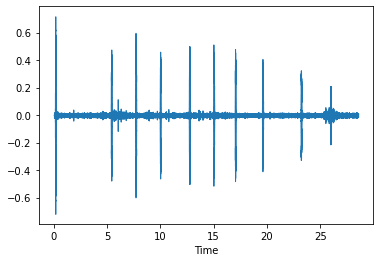

In [21]:
# plt.figure(figsize = (25,10))
librosa.display.waveshow(y, sr = sr)

#### Short Time Fourier Transform
STFT breaks up the audio signal into smaller sections by using a sliding time window. It takes the FFT on each section and then combines them. 

In [22]:
# Define frame size and hop size for STFT
FRAME_SIZE = 256
HOP_SIZE = 128

In [23]:
S_y = librosa.stft(y, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [24]:
print(S_y.shape)
print(type(S_y[0][0]))

(129, 4923)
<class 'numpy.complex64'>


#### Calculating Spectrograms
A Spectrogram breaks a sound signal into smaller pieces of time and then uses the Fourier Transform on each piece to figure out the frequencies in that piece. The Fourier Transforms for all of these segments are then added together to make a single plot.

In [25]:
Y = np.abs(S_y) ** 2

In [26]:
print(Y.shape)
print(type(Y[0][0]))

(129, 4923)
<class 'numpy.float32'>


In [27]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
#     plt.figure(figsize=(15, 7))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis,
                             cmap=plt.get_cmap('viridis'))
#     plt.colorbar(format="%+2.f")

#### Type 1. Linear frequency Spectrograms
Source : https://youtube.com/playlist?list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0

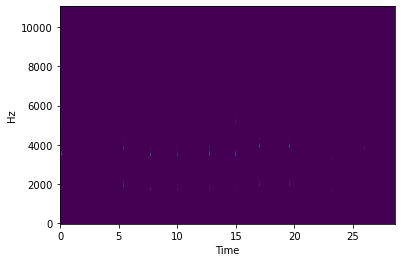

In [28]:
plot_spectrogram(Y, sr, HOP_SIZE)

#### Type 2. Log-Amplitude Spectrogram

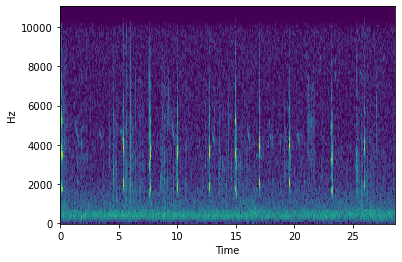

In [29]:
Y_log = librosa.power_to_db(Y)
plot_spectrogram(Y_log, sr, HOP_SIZE)

#### Type 3. Log-Frequency Spectrogram

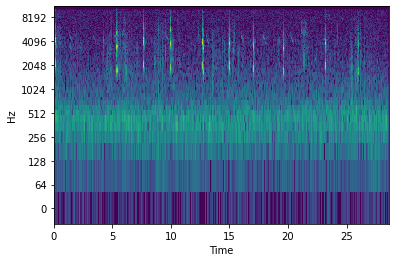

In [30]:
plot_spectrogram(Y_log, sr, HOP_SIZE, y_axis="log")

#### Calculate Mel Spectrogram
A Mel Spectrogram is different from a regular Spectrogram that shows Frequency vs. Time in two different ways. 
- On the y-axis, the Mel Scale is used instead of the Frequency scale. 
- It shows colours with the Decibel Scale instead of Amplitude.

In [31]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr)
S_db_mel = librosa.power_to_db(S, ref=np.max)

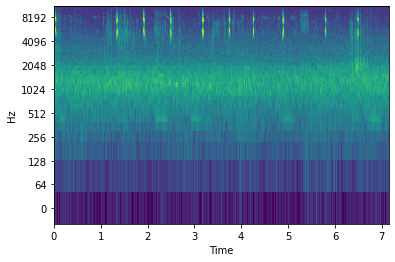

In [32]:
plot_spectrogram(S_db_mel, sr, HOP_SIZE, y_axis="log")

## 4. Preprocessing on Audio File

### Resize length of audio 

In [33]:
def resize(audio, duration):
    sig, rate = audio
    num_sample = int(duration * rate)
    if len(sig) < num_sample:
        sig_padded = np.zeros(num_sample, dtype=sig.dtype)
        sig_padded[:len(sig)] = sig
        sig = sig_padded
    else:  
        sig = sig[:num_sample]
    return (sig, rate)

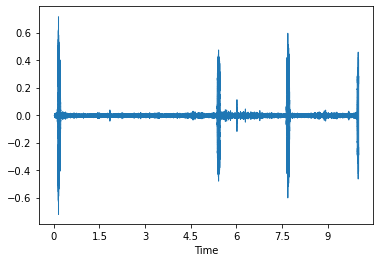

In [34]:
resized_sonspa, rate = resize((y, sr), duration = 10)
librosa.display.waveshow(resized_sonspa, sr = sr)

In [35]:
FRAME_SIZE = 1024
HOP_SIZE = 1736

In [36]:
S = librosa.feature.melspectrogram(y=resized_sonspa,
                                   sr=22050,
                                   hop_length = HOP_SIZE,
                                   n_fft = 1024,
                                   n_mels = 48)
S_db_mel = librosa.power_to_db(S, ref=np.max)

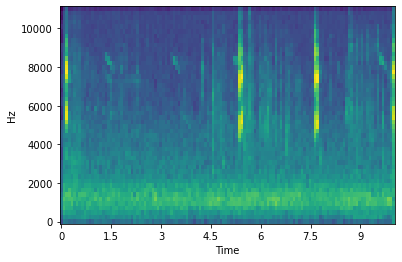

In [37]:
plot_spectrogram(S_db_mel, 22050, HOP_SIZE)

### Audio augmentation

In [38]:
def augment_audio(audio, shift_limit = 0.5):
    sig, rate = audio
    shift_samples = int(np.random.random() * shift_limit * len(sig))
    shifted_audio = np.roll(sig, shift_samples)
    
    return (shifted_audio, rate)

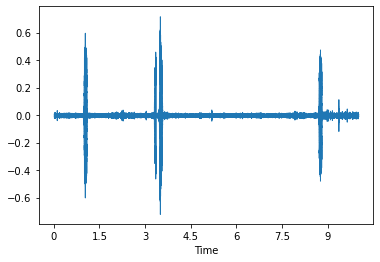

In [39]:
augmented_sonspa, rate = augment_audio((resized_sonspa, rate))
librosa.display.waveshow(augmented_sonspa, sr = rate)

In [40]:
resized_acafly, rate = resize((y, sr), duration = 10)
augmented_acafly, rate = augment_audio((resized_acafly, rate))

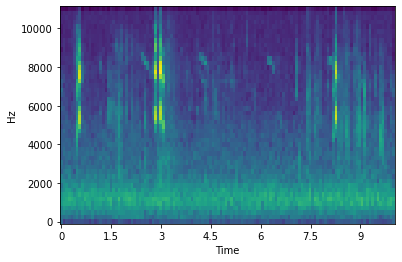

In [41]:
S = librosa.feature.melspectrogram(y=augmented_acafly,
                                   sr=22050,
                                   hop_length = HOP_SIZE,
                                   n_fft = 1024,
                                   n_mels = 48)
S_db_aug_mel = librosa.power_to_db(S, ref=np.max)
plot_spectrogram(S_db_aug_mel, sr, HOP_SIZE)

### Augmentation of Spectrogram using time and frequency mask
Source : https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5

In [42]:
def time_mask(spec, T=10, num_masks=1, replace_with_zero=False):
    cloned = spec.copy()
    for i in range(0, num_masks):
        t = np.random.uniform(low=0.0, high=T)
        t = int(t)
        t_zero = np.random.randint(low=0, high=cloned.shape[1] - t)
        if replace_with_zero:
            cloned[:, t_zero:t_zero + t] = 0
        else:
            cloned[:, t_zero:t_zero + t] = np.mean(cloned)

    return cloned

def freq_mask(spec, F=20, num_masks=1, replace_with_zero=False):
    cloned = spec.copy()
    for i in range(0, num_masks):
        f = np.random.uniform(low=0.0, high=F)
        f = int(f)
        f_zero = np.random.randint(low=0, high=cloned.shape[0] - f)
        if replace_with_zero:
            cloned[f_zero:f_zero + f, :] = 0
        else:
            cloned[f_zero:f_zero + f, :] = np.mean(cloned)
    return cloned

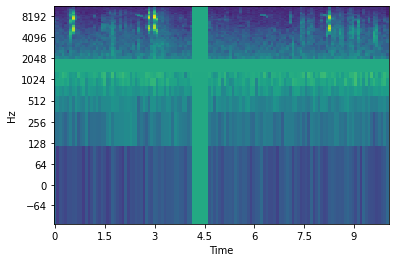

In [43]:
spec = S
spec_time_masked = time_mask(spec)
spec_freq_masked = freq_mask(spec_time_masked)
S_db_mel_aug = librosa.power_to_db(spec_freq_masked, ref=np.max)

plot_spectrogram(S_db_mel_aug, sr, HOP_SIZE, y_axis="log")